In [ ]:
from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#from google.colab import files
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data

brimosentiment = pd.read_csv(r'/content/drive/MyDrive/hasil.csv')

In [ ]:
brimosentiment

,userName,score,at,content,content_tokens,content_tokens_fdist,content_tokens_WSW,content_normalized,content_tokens_stemmed,polarity_score,polarity
0,Hijjatun Nadia,5,2022-08-15 12:20:30,sangat membantu untuk penjual online seperti s...,"['sangat', 'membantu', 'untuk', 'penjual', 'on...",<FreqDist with 45 samples and 54 outcomes>,"['membantu', 'penjual', 'online', 'order', 'ba...","['membantu', 'penjual', 'online', 'order', 'ba...","['bantu', 'jual', 'online', 'order', 'barang',...",-9,negative
1,Eva Juwitasari,5,2022-09-05 11:32:59,brimo sangat membantu saya dlm bertransaksi,"['brimo', 'sangat', 'membantu', 'saya', 'dlm',...",<FreqDist with 6 samples and 6 outcomes>,"['brimo', 'membantu', 'bertransaksi']","['brimo', 'membantu', 'bertransaksi']","['brimo', 'bantu', 'transaksi']",3,positive
2,Eko Hartono,5,2022-08-15 11:33:36,bagus lebih mudah dan simpel kalau bisa ditamb...,"['bagus', 'lebih', 'mudah', 'dan', 'simpel', '...",<FreqDist with 15 samples and 16 outcomes>,"['bagus', 'mudah', 'simpel', 'pembayaran', 'kr...","['bagus', 'mudah', 'simpel', 'pembayaran', 'kr...","['bagus', 'mudah', 'simpel', 'bayar', 'kredit'...",2,positive
3,lega lego,5,2022-09-05 13:53:04,mudah dan simple pake brimo,"['mudah', 'dan', 'simple', 'pake', 'brimo']",<FreqDist with 5 samples and 5 outcomes>,"['mudah', 'simple', 'pake', 'brimo']","['mudah', 'simple', 'pakai', 'brimo']","['mudah', 'simple', 'pakai', 'brimo']",6,positive
4,Aldi Aditya,5,2022-08-15 10:25:12,mantap aplikasi brimo semoga semakin berkemban...,"['mantap', 'aplikasi', 'brimo', 'semoga', 'sem...",<FreqDist with 15 samples and 16 outcomes>,"['mantap', 'aplikasi', 'brimo', 'semoga', 'ber...","['mantap', 'aplikasi', 'brimo', 'semoga', 'ber...","['mantap', 'aplikasi', 'brimo', 'moga', 'kemba...",12,positive
...,...,...,...,...,...,...,...,...,...,...,...
1995,Mumut raguno,5,2022-04-03 23:09:46,saya sangat senang dengan aplikasi ini memilik...,"['saya', 'sangat', 'senang', 'dengan', 'aplika...",<FreqDist with 16 samples and 17 outcomes>,"['senang', 'aplikasi', 'memiliki', 'fitur', 'l...","['senang', 'aplikasi', 'memiliki', 'fitur', 'l...","['senang', 'aplikasi', 'milik', 'fitur', 'leng...",2,positive
1996,Luluk Madinatul,5,2022-04-01 16:14:15,aplikasi nya sangat membantumulai dari transfe...,"['aplikasi', 'nya', 'sangat', 'membantumulai',...",<FreqDist with 27 samples and 27 outcomes>,"['aplikasi', 'membantumulai', 'transferbelanja...","['aplikasi', 'membantumulai', 'transferbelanja...","['aplikasi', 'membantumulai', 'transferbelanja...",-6,negative
1997,John herlino,5,2022-03-31 2:30:26,cukup membantu pakai aplikasi ini dari pada an...,"['cukup', 'membantu', 'pakai', 'aplikasi', 'in...",<FreqDist with 45 samples and 54 outcomes>,"['membantu', 'pakai', 'aplikasi', 'antre', 'te...","['membantu', 'pakai', 'aplikasi', 'antre', 'te...","['bantu', 'pakai', 'aplikasi', 'antre', 'telle...",-7,negative
1998,lega lego,5,2022-09-05 13:53:04,mudah dan simple pake brimo,"['mudah', 'dan', 'simple', 'pake', 'brimo']",<FreqDist with 5 samples and 5 outcomes>,"['mudah', 'simple', 'pake', 'brimo']","['mudah', 'simple', 'pakai', 'brimo']","['mudah', 'simple', 'pakai', 'brimo']",6,positive


In [ ]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(brimosentiment['content_tokens_stemmed'], brimosentiment['polarity'], test_size = 0.2, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [ ]:
df_train80 = pd.DataFrame()
df_train80['content_tokens_stemmed'] = train_X
df_train80['polarity'] = train_Y

df_test20 = pd.DataFrame()
df_test20['content_tokens_stemmed'] = test_X
df_test20['polarity'] = test_Y

In [ ]:
df_train80

,content_tokens_stemmed,polarity
582,"['verifikasi', 'video', 'ribet', 'gagal', 'mes...",negative
159,"['saran', 'catat', 'uang', 'isi', 'tanggal', '...",negative
1827,"['milik', 'fitur', 'lengkap', 'mudah', 'univer...",positive
318,"['senang', 'aplikasi', 'inimempermudah', 'tran...",negative
708,"['puas', 'cepat']",positive
...,...,...
835,"['coba', 'daftar', 'bri', 'mobile', 'alas', 'k...",negative
1216,"['aplikasi', 'brimo', 'hari', 'ganggu', 'login...",positive
1653,"['kali', 'video', 'daftar', 'kendala', 'jaring...",negative
559,"['mudah', 'sulit', 'pakai', 'kartu', 'debit', ...",negative


In [ ]:
df_test20

,content_tokens_stemmed,polarity
405,"['aplikasi', 'bagus', 'tingkat', 'inovasi', 'f...",positive
1190,"['aplikasi', 'brimo', 'maintenance', 'siang', ...",negative
1132,"['guna', 'mudah', 'cepat']",positive
731,"['jelek', 'bangat', 'aplikasisdh', 'swa', 'fot...",negative
1754,"['nyaman', 'mudah', 'transaksi', 'cek', 'saldo']",positive
...,...,...
638,"['registrasi', 'aplikasi', 'macet', 'verifikas...",negative
360,"['kok', 'salah', 'transfer', 'bri', 'kemarin',...",negative
1810,"['aplikasi', 'susah', 'bngt', 'dftrambil', 'vi...",negative
1743,"['muas', 'transaksi', 'sms', 'bankking', 'sala...",negative


In [ ]:
df_train80.to_csv(r"df_train80.csv")
df_test20.to_csv(r"df_test20.csv")

In [ ]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_8020 = TfidfVectorizer(max_features = 5000)
tfidf_vect_8020.fit(brimosentiment['content_tokens_stemmed'])
train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80['content_tokens_stemmed'])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20['content_tokens_stemmed'])

In [ ]:
tfidf_vect_8020

TfidfVectorizer(max_features=5000)

In [ ]:
print(train_X_tfidf_8020)

  (0, 3422)	0.16616359138483788
  (0, 3411)	0.1831727344458944
  (0, 3129)	0.3911306229373523
  (0, 3101)	0.3367948813022645
  (0, 3080)	0.3710769173822128
  (0, 2753)	0.3911306229373523
  (0, 2618)	0.20627100249511687
  (0, 2057)	0.10176044158719307
  (0, 1998)	0.2985540510883139
  (0, 1668)	0.3710769173822128
  (0, 1058)	0.1490755902576952
  (0, 218)	0.2824591396671767
  (1, 3386)	0.17773069080975903
  (1, 3325)	0.1602022930597989
  (1, 3053)	0.2221181358646942
  (1, 3046)	0.18996711051535256
  (1, 2713)	0.18171315274378955
  (1, 2278)	0.20448489103436798
  (1, 2000)	0.2583387617950179
  (1, 1511)	0.20448489103436798
  (1, 1477)	0.28315707151763697
  (1, 1335)	0.34023974947502694
  (1, 782)	0.5663141430352739
  (1, 736)	0.10484060993893037
  (1, 728)	0.28315707151763697
  :	:
  (1597, 736)	0.28229485149695244
  (1597, 228)	0.23628053875710575
  (1597, 158)	0.21078076686788655
  (1598, 2992)	0.5161170937939681
  (1598, 2298)	0.18489683093635187
  (1598, 2057)	0.1283892512303515
  (159

In [ ]:
print(test_X_tfidf_8020)

  (0, 3247)	0.1769398790330477
  (0, 3209)	0.29203918189960676
  (0, 2095)	0.27862012652686335
  (0, 2057)	0.1366630680899909
  (0, 1303)	0.5252837951648119
  (0, 1026)	0.5252837951648119
  (0, 635)	0.43320305813217824
  (0, 228)	0.1627875267319788
  (0, 158)	0.14521923769763362
  (1, 3462)	0.18578899820582842
  (1, 3107)	0.25572227825534344
  (1, 2895)	0.43317212700015745
  (1, 2855)	0.3186040785603911
  (1, 2298)	0.16018711418144893
  (1, 1832)	0.35258767196770263
  (1, 1617)	0.16826483402984946
  (1, 1317)	0.17317227760802553
  (1, 650)	0.23769318645464624
  (1, 542)	0.12608820980491156
  (1, 450)	0.3405241733097397
  (1, 250)	0.4275329709307132
  (1, 228)	0.13249415949020313
  (1, 158)	0.11819517887408414
  (2, 2057)	0.38657944464723976
  (2, 1170)	0.7150318797493291
  :	:
  (398, 1243)	0.1935098292353519
  (398, 1237)	0.1537231719729505
  (398, 787)	0.19955975574658308
  (398, 533)	0.11980399561608669
  (398, 497)	0.32890509988198174
  (398, 430)	0.1979499184451457
  (398, 294)	0.

In [ ]:
print(train_X_tfidf_8020.shape)
print(test_X_tfidf_8020.shape)

(1600, 3497)
(400, 3497)


In [ ]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_8020.vocabulary_)

{'bantu': 298, 'jual': 1404, 'online': 2255, 'order': 2275, 'barang': 312, 'bayar': 328, 'via': 3420, 'transfer': 3260, 'bank': 288, 'mesin': 1997, 'atm': 196, 'lupa': 1815, 'recommended': 2560, 'banget': 275, 'aplikasi': 158, 'pas': 2324, 'jalan': 1345, 'bawa': 323, 'kartu': 1464, 'ambil': 96, 'uang': 3325, 'tunai': 3307, 'baik': 255, 'pokok': 2454, 'brimo': 542, 'transaksi': 3247, 'bagus': 228, 'mudah': 2057, 'simpel': 2886, 'kredit': 1640, 'motor': 2043, 'rumah': 2652, 'simple': 2889, 'pakai': 2298, 'mantap': 1871, 'moga': 2037, 'kembang': 1518, 'depan': 800, 'safety': 2667, 'aman': 89, 'fitur': 1025, 'lengkap': 1749, 'lumayan': 1813, 'guna': 1170, 'sulit': 2992, 'user': 3386, 'membantuterimakasih': 1946, 'alhamdulilah': 72, 'terima': 3131, 'kasih': 1472, 'sukses': 2988, 'tingkat': 3209, 'nasabah': 2095, 'aktifitas': 52, 'puntrimakasih': 2522, 'brimosemoga': 556, 'alat': 66, 'favorit': 1011, 'daftar': 736, 'susah': 3005, 'coba': 693, 'sekian': 2770, 'purnama': 2525, 'tips': 3212, 'j

In [ ]:
# Proses Pelatihan
''' awalnya begini ya

from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_a_tfidf,train_b)

trus diganti jadi begini'''

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_8020,train_Y)

SVC(kernel='linear')

In [ ]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_8020 = model.predict(test_X_tfidf_8020)
test_prediction_8020 = pd.DataFrame()
test_prediction_8020['content_tokens_stemmed'] = test_X
test_prediction_8020['polarity'] = predictions_SVM_8020
SVM_accuracy_8020 = accuracy_score(predictions_SVM_8020, test_Y)*100
SVM_accuracy_8020 = round(SVM_accuracy_8020,1)

In [ ]:
test_prediction_8020

,content_tokens_stemmed,polarity
405,"['aplikasi', 'bagus', 'tingkat', 'inovasi', 'f...",positive
1190,"['aplikasi', 'brimo', 'maintenance', 'siang', ...",negative
1132,"['guna', 'mudah', 'cepat']",positive
731,"['jelek', 'bangat', 'aplikasisdh', 'swa', 'fot...",negative
1754,"['nyaman', 'mudah', 'transaksi', 'cek', 'saldo']",positive
...,...,...
638,"['registrasi', 'aplikasi', 'macet', 'verifikas...",negative
360,"['kok', 'salah', 'transfer', 'bri', 'kemarin',...",negative
1810,"['aplikasi', 'susah', 'bngt', 'dftrambil', 'vi...",negative
1743,"['muas', 'transaksi', 'sms', 'bankking', 'sala...",negative


In [ ]:
test_prediction_8020.to_csv(r"test_prediction_8020.csv")

In [ ]:
SVM_accuracy_8020

90.5

In [ ]:
from sklearn.metrics import precision_score

SVM_precision_8020 = precision_score(test_Y, predictions_SVM_8020)
SVM_precision_8020 = round(SVM_precision_8020,1)

ValueError: ignored

In [ ]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_8020))
# Confusion matrixSVM
tn, fp, fn, tp = confusion_matrix(test_Y, predictions_SVM_8020).ravel()
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)


Here is the classification report:
              precision    recall  f1-score   support

    negative       0.89      0.95      0.92       239
    positive       0.92      0.83      0.88       161

    accuracy                           0.91       400
   macro avg       0.91      0.89      0.90       400
weighted avg       0.91      0.91      0.90       400

True Positive :  134
True Negative :  228
False Positive :  11
False Negative  :  27


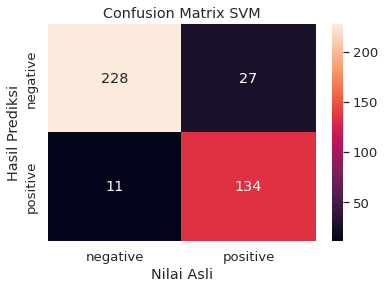

In [ ]:
matriks = confusion_matrix(predictions_SVM_8020, test_Y)
class_label = ["negative", "positive"]
canv = pd.DataFrame(matriks, index = class_label, columns = class_label)
sns.heatmap(canv, annot = True,fmt="d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Nilai Asli")
plt.ylabel("Hasil Prediksi")

plt.show()

### Bar and Pie Plot

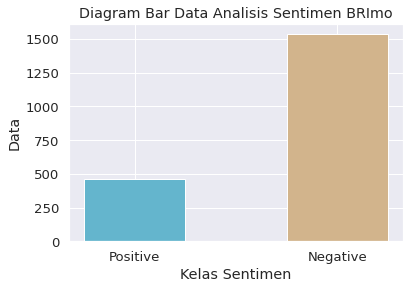

In [ ]:
#Bar plot for brimo reviews

labels = ['Positive','Negative']
Category1 = [464, 1536]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['c', 'tan'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen BRImo')
plt.savefig(r"bar_data.png")
plt.show()

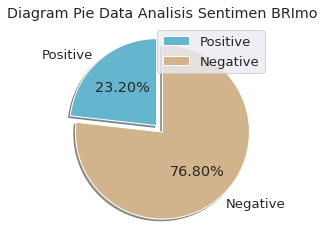

In [ ]:
#pie chart for brimo reviews

color = ['c', 'tan']
plt.pie(Category1, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie Data Analisis Sentimen BRImo')
plt.legend()
plt.savefig(r"pie_data.png")
plt.show()

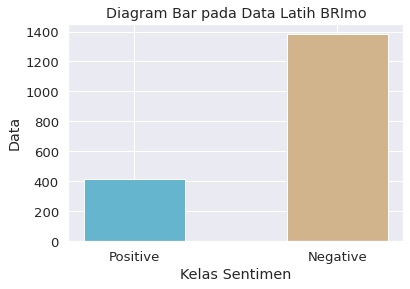

In [ ]:
#Bar plot for Train Set

labels = ['Positive','Negative']
Category2 = [418, 1382]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['c', 'tan'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Latih BRImo')
plt.savefig(r"bar_datalatih.png")
plt.show()

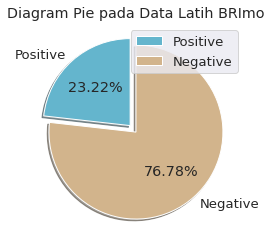

In [ ]:
#pie chart for Train Set

color = ['c', 'tan']
plt.pie(Category2, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Data Latih BRImo')
plt.legend()
plt.savefig(r"pie_datalatih.png")
plt.show()

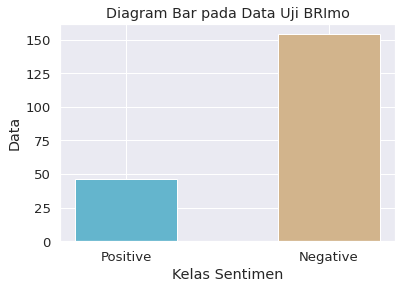

In [ ]:
#Bar plot for Test Set

labels = ['Positive','Negative']
Category3 = [46, 154]
plt.bar(labels, Category3, tick_label=labels, width=0.5, color=['c', 'tan'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Uji BRImo')
plt.savefig(r"bar_datauji.png")
plt.show()

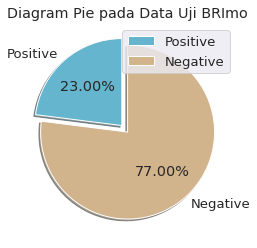

In [ ]:
#pie chart for Test Set

color = ['c', 'tan']
plt.pie(Category3, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Data Uji BRImo')
plt.legend()
plt.savefig(r"pie_datauji.png")
plt.show()

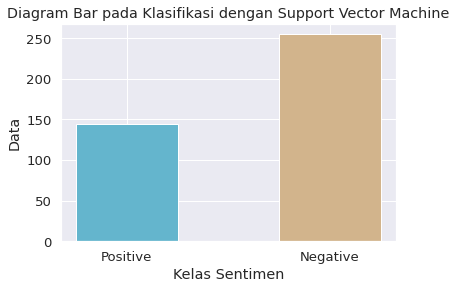

In [ ]:
#Bar plot for Klasifikasi dengan SVM

labels = ['Positive','Negative']
Category4 = [145, 255]
plt.bar(labels, Category4, tick_label=labels, width=0.5, color=['c', 'tan'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan Support Vector Machine')
plt.savefig(r"bar_svm.png")
plt.show()

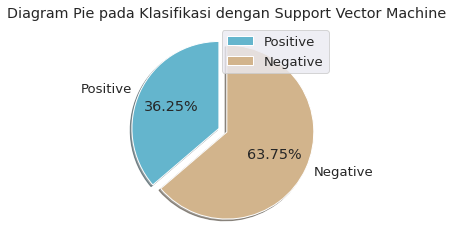

In [ ]:
#pie chart for Klasifikasi dengan SVM

color = ['c', 'tan']
plt.pie(Category4, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Klasifikasi dengan Support Vector Machine')
plt.legend()
plt.savefig(r"pie_svm.png")
plt.show()

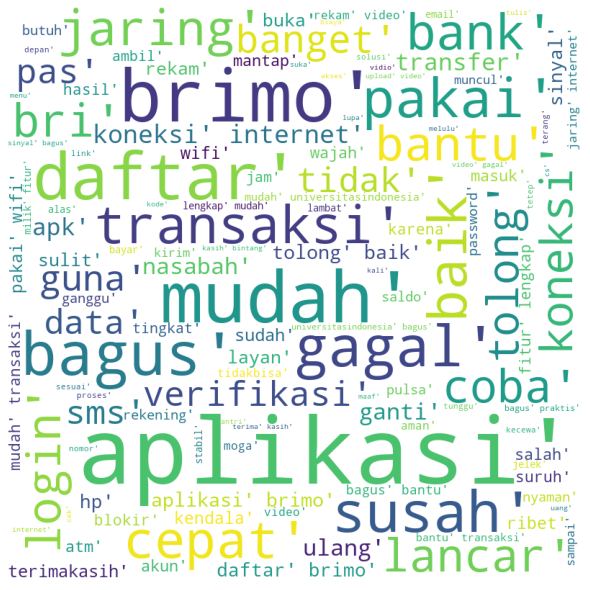

In [ ]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'test_prediction_8020.csv' file
df = pd.read_csv(r"test_prediction_8020.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.content_tokens_stemmed:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()